In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
import pandas as pd

# Load dataset
data = pd.read_csv("data.csv")

# Show first 5 rows
print(data.head())

# Check columns and info
print(data.info())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. حذف id
data = data.drop("id", axis=1)

# 2. تحويل diagnosis إلى أرقام
data["diagnosis"] = data["diagnosis"].map({"M": 0, "B": 1})

# 3. تقسيم الميزات والهدف
X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]

# 4. تقسيم إلى train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. تطبيع الميزات
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape, X_test.shape)


(455, 30) (114, 30)


In [10]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # طبقة أكبر
    Dropout(0.3),  # زيادة Dropout لتقليل overfitting
    Dense(32, activation='relu'),  # طبقة مخفية ثانية
    Dropout(0.2),
    Dense(16, activation='relu'),  # طبقة ثالثة
    Dense(1, activation='sigmoid')  # طبقة الإخراج
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)



In [13]:
early_stop = EarlyStopping(
    monitor='val_loss',  # مراقبة الخسارة على مجموعة التحقق
    patience=10,         # إذا لم تتحسن الخسارة لـ 10 epochs، إيقاف التدريب
    restore_best_weights=True
)


In [14]:
history = model.fit(
    X_train, y_train,
    epochs=100,           # زيادة عدد epochs
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop]  # استخدام EarlyStopping
)


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.7315 - loss: 0.5727 - val_accuracy: 0.9341 - val_loss: 0.3415
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8987 - loss: 0.3245 - val_accuracy: 0.9560 - val_loss: 0.2043
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9330 - loss: 0.2125 - val_accuracy: 0.9451 - val_loss: 0.1520
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9369 - loss: 0.1839 - val_accuracy: 0.9451 - val_loss: 0.1340
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9408 - loss: 0.1218 - val_accuracy: 0.9670 - val_loss: 0.1301
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9560 - loss: 0.1129 - val_accuracy: 0.9451 - val_loss: 0.1280
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9710 - loss: 0.1182 - val_accuracy: 0.9451 - val_loss: 0.1298
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9476 - loss: 0.0997 - val_accuracy: 0.

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

y_pred = (model.predict(X_test) > 0.5).astype(int)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9651 - loss: 0.0928
Test Accuracy: 0.9649122953414917
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
[[40  3]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [6]:
history = model.fit(
    X_train, y_train,
    epochs=50,           # عدد مرات مرور البيانات
    batch_size=16,       # عدد العينات لكل تحديث أوزان
    validation_split=0.2 # 20% من بيانات التدريب للتحقق
)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4831 - loss: 0.7078 - val_accuracy: 0.8901 - val_loss: 0.5252
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8192 - loss: 0.5338 - val_accuracy: 0.9231 - val_loss: 0.3785
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9341 - loss: 0.3479 - val_accuracy: 0.9451 - val_loss: 0.2772
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9594 - loss: 0.2637 - val_accuracy: 0.9451 - val_loss: 0.2141
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9524 - loss: 0.1977 - val_accuracy: 0.9451 - val_loss: 0.1782
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9625 - loss: 0.1453 - val_accuracy: 0.9451 - val_loss: 0.1568
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9723 - loss: 0.1347 - val_accuracy: 0.9451 - val_loss: 0.1428
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9692 - loss: 0.1142 - val_accuracy: 0.9451 - val_loss

In [7]:
from sklearn.metrics import confusion_matrix, classification_report

# دقة النموذج على بيانات الاختبار
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# التنبؤ
y_pred = (model.predict(X_test) > 0.5).astype(int)

# مصفوفة الالتباس وتقارير التصنيف
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9707 - loss: 0.1177 
Test Accuracy: 0.9736841917037964
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[41  2]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



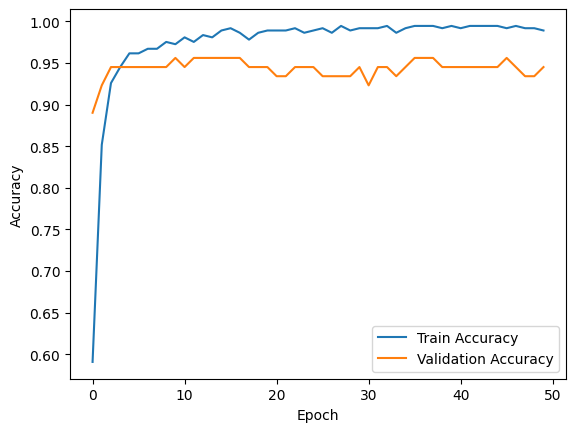

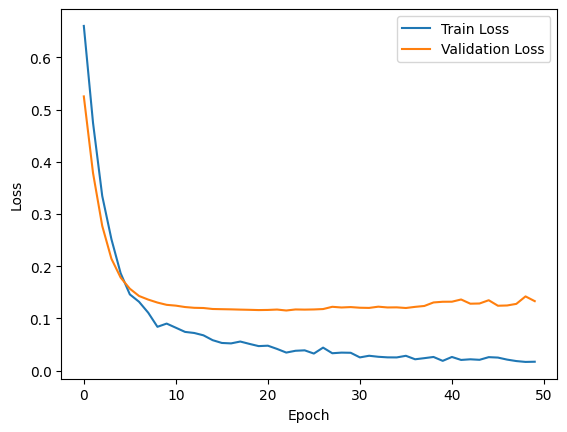

In [8]:
import matplotlib.pyplot as plt

# رسم دقة التدريب مقابل التحقق
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# رسم الخسارة
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
